In [1]:
import os
import json
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
dsrc = 'D3'
category = 'DR'
prev_base_dir = f'/data/ephemeral/home/data/{dsrc}/{category}/'

durations = []
for base_dir in [prev_base_dir+x for x in ['train', 'test']]:
    for file in sorted(os.listdir(os.path.join(base_dir, 'labels'))):
        if file.startswith('.'):
            continue
        label_file_name = os.path.join(base_dir, 'labels', file)
        with open(label_file_name) as f:
            label = json.load(f)
            time_format = "%H:%M:%S"
            start = label[os.path.basename(label_file_name).split('.')[0]]['start_time']
            end = label[os.path.basename(label_file_name).split('.')[0]]['end_time']
            time_diff = datetime.strptime(end, time_format) - datetime.strptime(start, time_format)
            durations.append(time_diff)
durations_in_seconds = [duration.total_seconds() for duration in durations]

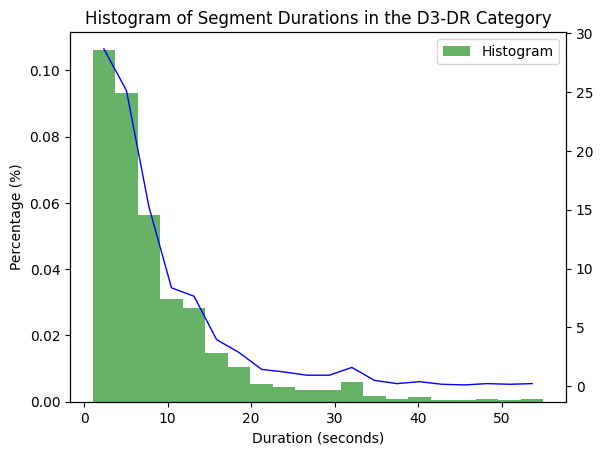

In [ ]:
# 첫 번째 축 생성
fig, ax1 = plt.subplots()

# 히스토그램 그리기
count, bins, _ = ax1.hist(durations_in_seconds, bins=20, density=True, alpha=0.6, color='g', label='Histogram')

# 두 번째 축 생성 (y축을 공유하되 독립적으로 사용)
ax2 = ax1.twinx()

# 각 구간의 비율 계산 (백분율로 변환)
bin_width = np.diff(bins)  # 각 bin의 너비
bin_centers = bins[:-1] + bin_width / 2  # bin의 중심

# 비율을 선 그래프로 표시
percentage = count / sum(count) * 100  # 각 bin의 비율(퍼센트) 계산
ax2.plot(bin_centers, percentage, color='b', label='Percentage', marker='', linestyle='-', linewidth=1)

# x축, y축 라벨 추가
ax1.set_xlabel('Duration (seconds)')
ax1.set_ylabel('Density')
ax2.set_ylabel('Percentage (%)')

# 타이틀 추가
plt.title(f'Histogram of Segment Durations in the {dsrc}-{category} Category')

# 범례 추가
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))  # 살짝 아래로 조정

# 그래프 표시
plt.savefig(f'./duration_histogram_{dsrc}_{category}.png')
plt.show()

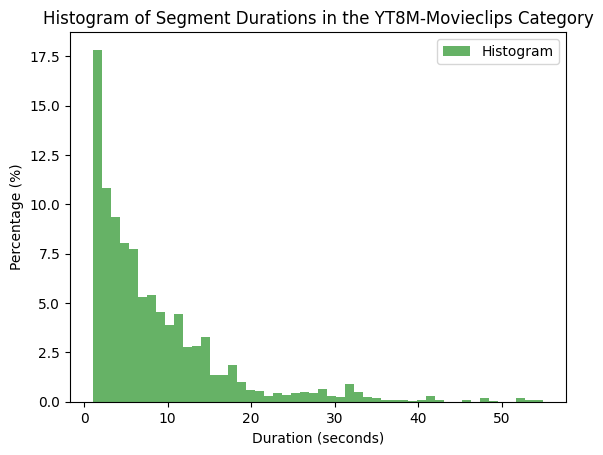

In [7]:
fig, ax1 = plt.subplots()

# 히스토그램 그리기
ax1.hist(durations_in_seconds, bins=50, density=True, alpha=0.6, color='g', label='Histogram', log=True)

# x축, y축 라벨 추가
ax1.set_xlabel('Duration (seconds)')
ax1.set_ylabel('Density')
# 타이틀 추가
plt.title(f'Histogram of Segment Durations in the {dsrc}-{category} Category')

# 범례 추가
ax1.legend(loc='upper right')

# 그래프 표시
plt.savefig(f'./duration_histogram_{dsrc}_{category}_without_line.png')
plt.show()

In [58]:
sorted(durations_in_seconds)[-130:]

[76.0,
 76.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 80.0,
 80.0,
 80.0,
 81.0,
 81.0,
 82.0,
 82.0,
 82.0,
 84.0,
 84.0,
 85.0,
 85.0,
 85.0,
 87.0,
 87.0,
 88.0,
 89.0,
 89.0,
 90.0,
 90.0,
 91.0,
 91.0,
 91.0,
 91.0,
 92.0,
 92.0,
 93.0,
 93.0,
 94.0,
 94.0,
 94.0,
 94.0,
 94.0,
 94.0,
 95.0,
 95.0,
 95.0,
 96.0,
 96.0,
 96.0,
 97.0,
 97.0,
 98.0,
 99.0,
 104.0,
 105.0,
 106.0,
 107.0,
 107.0,
 107.0,
 109.0,
 110.0,
 110.0,
 110.0,
 110.0,
 116.0,
 117.0,
 117.0,
 119.0,
 120.0,
 122.0,
 125.0,
 125.0,
 127.0,
 129.0,
 129.0,
 130.0,
 130.0,
 131.0,
 132.0,
 133.0,
 133.0,
 134.0,
 134.0,
 138.0,
 138.0,
 138.0,
 139.0,
 140.0,
 142.0,
 142.0,
 148.0,
 150.0,
 152.0,
 154.0,
 155.0,
 155.0,
 156.0,
 156.0,
 156.0,
 157.0,
 157.0,
 158.0,
 162.0,
 162.0,
 165.0,
 165.0,
 168.0,
 170.0,
 178.0,
 181.0,
 181.0,
 182.0,
 191.0,
 198.0,
 206.0,
 207.0,
 212.0,
 213.0,
 218.0,
 237.0,
 238.0,
 240.0,
 242.0,
 269.0,
 276.0,
 304.0,
 307.0,
 311.0,
 350.0,
 397.0]